# Other shapely geometries. Buffers, area, and centroids. Boolean logic in shapely. Spatial joins

Today's notebook is mostly about different kinds of geometries that we have access to through the shapely library and accessing attributes or properties of them. We'll also see how to perform the Boolean logic operations that we talked about on Tuesday, intersection and union, on shapely geometries. All of this will culminate in one of the key data management tools for spatial data: the spatial join.

As always, let's start by loading some relevant libraries. For now, we'll just load `shapely.geometry`, which will have all the geometries we talked about in class on Tuesday.

In [1]:
import shapely.geometry as shg

It turns out that shapely has a single data structure that is both what we called a "line" and a "polyline" in class on Tuesday. These are `LineString`s. You can see the documentation [here](https://shapely.readthedocs.io/en/latest/reference/shapely.LineString.html). Here, we simply supply the endpoints, or vertices of a line and shapely fills in the set of points between them.

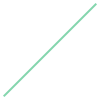

In [2]:
# Let's make two points first
p1 = shg.Point(1,1)
p2 = shg.Point(2,2)

# Now make the line between them
line = shg.LineString([p1,p2]) # We make the line from a list of the two endpoints
line

Making a polyline is as simple as making the list longer than 2 endpoints long. Shapely assumes they're listed in order, so the 2nd point is the end of the first line and the beginning of the second line, etc.

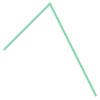

In [3]:
p3 = shg.Point(3,0)

polyline = shg.LineString([p1,p2,p3])
polyline

What happens if the lines cross?

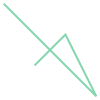

In [4]:
p4 = shg.Point(0,3)

polyline2 = shg.LineString([p1,p2,p3,p4])
polyline2

Shapely handles that no problem! Some other GIS softwares don't like these kinds of crosses, but shapely handles them just fine.

Now let's turn to polygons. I mentioned (briefly) in class on Tuesday that one way to define a polygon is to make a polyline that ends at its starting vertex and say everything inside it is also part of the polygon. It turns out, we can define a `shapely.Polygon` in a similar way: we list the coordinates (or points) of the polyline that defines its boundary and shapely fills in the inside. Here, it just assumes the first vertex is the final vertex as well.

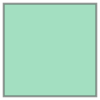

In [5]:
# Let's make a new set of points to use here. We'll make a simple square this time
p5 = shg.Point(0,0)
p6 = shg.Point(0,1)
p7 = shg.Point(1,1)
p8 = shg.Point(1,0)

polygon = shg.Polygon([p5,p6,p7,p8])
polygon

And what happens now if there's a crossing in the boundary?

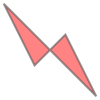

In [6]:
polygon2 = shg.Polygon([p1,p2,p3,p4]) # Same points as our crossing line string above
polygon2

Shapely will still make it, but notice that the inside is red, rather than green. This is because the "invalid" because of its crossing boundary, and so will cause an error if certain operations are performed on it.

Also note that the order of the points matters! We can make a similar invalid geometry if we mix up the order of the points in our square.

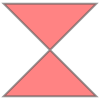

In [7]:
polygon3 = shg.Polygon([p5,p7,p6,p8])
polygon3

Shapely also provides a function to make a particularly common kind of polygon: `shapely.geometry.box`, which makes rectangles. See the documentation [here](https://shapely.readthedocs.io/en/2.0.7/reference/shapely.box.html). You can make a box by supplying the minimum X-axis position, minimum Y-axis position, maximum X-axis position, and maximum Y-axis position.

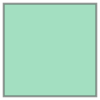

In [8]:
# Let's remake that square we made above using box

shg.box(0, # minimum x
        0, # minimum y
        1, # maximum x
        1) # maximum y

One other way to make new polygons is to buffer other geometries. "Buffering" means finding all points within a certain distance of a geometry. It's easiest to think about this with a single point: all points within some distance of a point is a circle, so the result when we buffer a point is a circle. `buffer` is a "method" on all `shapely.geometry` classes, which means it's a function that works the same way from all the different kinds of `shapely.geometry` objects, and can be implemented by adding `.buffer()` to the end of a `shapely.geometry` object.

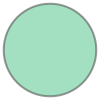

In [42]:
# Let's make a circle around p1
c1 = p1.buffer(1) # radius is 1
c1

As mentioned above, you can buffer any kind of shapely geometry. Let's try it with a line

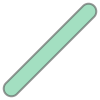

In [11]:
line.buffer(0.1)

Buffering can be really useful for "fixing" invalid geometries, because it automatically makes a valid geometry. So you can fix invalid geometries by buffering with radius 0. But be careful! When you have crossing lines in the boundary you can get weird results.

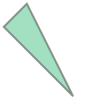

In [15]:
polygon2.buffer(0)

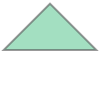

In [16]:
polygon3.buffer(0)

We also talked about the "convex hull," and how it can be used to make polygons, on Tuesday. Shapely has a `convex_hull` [function](https://shapely.readthedocs.io/en/stable/reference/shapely.convex_hull.html) in it's primary module that can be used to make convex hulls from points or other geometries.

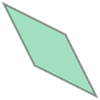

In [32]:
from shapely import convex_hull

'''
shapely calculates the convex hull of each geometry in a list, so we need to put a bunch of points in a MultiPoint to get it to work
'''
convex_hull(shg.MultiPoint([p1,p2,p3,p4])) 

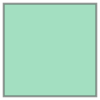

In [34]:
convex_hull(polygon3)

## Attributes and properties of polygons

Now that we have lots of different ways of making polygons, let's look at some of their properties and attributes. The most basic of these is area, which is stored in the `area` "attribute" of `shapely.geometry` classes. Attributes are like methods, but rather than functions they're variables associated with that particular "instantiation" of the class. So the area has already been calculated when we made the polygon and we're just retrieving it, rather than telling python to calculate the area. Similar to `buffer`, we access it by adding `.area` to the end of a `shapely.geometry`. Note the lack of `()` because it's a variable, not a function.

In [17]:
polygon.area # this is a square with side length 1, so area should be 1

1.0

In [43]:
c1.area # this is our circle with radius 1, so it's area should be pi

3.1365484905459393

Another way invalid geometries produce weird results:

In [20]:
polygon3.area

0.0

Another really useful attribute is the "centroid", which is kind of like the middle of a polygon. Slightly more technically, it is the average location within the polygon. Like the `area` attribute, the centroid can be accessed with `.centroid`.

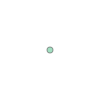

In [24]:
c1.centroid

We can also check if a polygon is convex by seeing if it is equal to its convex hull

In [35]:
polygon == convex_hull(polygon) # in python "==" asks "are these two things equal?" 

True

In [36]:
polygon3 == convex_hull(polygon3) 

False

## Boolean Logic

Now let's explore those two fundamental operations from Boolean set logic we talked about on Tuesday: intersection and union. Shapely has two ways to implement these. The first is functions in the primary module that take two geometries and evaluate their intersection/union. The second is as methods on geometries, which take another geometry as an argument. We'll see both.

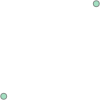

In [38]:
from shapely import union, intersection

union(p1,p2)

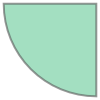

In [44]:
intersection(polygon,c1)

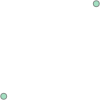

In [45]:
p1.union(p2)

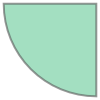

In [46]:
polygon.intersection(c1)

We can also simply check if two geometries intersect using the `intersects` function or method

In [47]:
from shapely import intersects

intersects(p1,p2)

np.False_

In [48]:
p1.intersects(p2)

False

In [49]:
polygon.intersects(c1)

True

In [50]:
polygon.intersects(p1)

True

## Spatial Join

Finally, let's put this Boolean logic to use in a spatial join. A "join" is database parlance for combining two datasets. In traditional tabular data, there are joins like "left join," "inner join," "outer join," etc which all describe which set of rows to keep from the two data sets. All traditional joins, though, share the feature that they use a subset of columns, the "keys," to decide which row gets matched to another.

In a spatial join, the locations are the keys! There are multiple kinds of spatial joins, which correspond to different rules for saying "do these geometries match?". Sometimes, we want to say they "match" if they intersect, other times if one is within the other. Geopandas provides a very useful and simple way of performing these spatial joins using `geopandas.sjoin` ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html)). By default, it assumes we want to say geometries match if they intersect, but this can be changed with the `predicate` argument. It also defaults to assuming we want to do an "inner join," that is, that we only want to keep matches. This can also be changed with the `how` argument. Let's see some examples.

<Axes: >

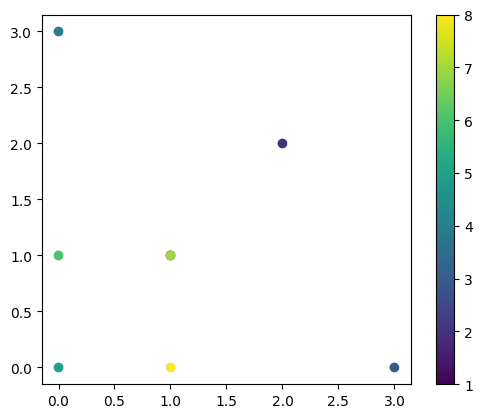

In [57]:
import pandas as pd
import geopandas as gpd

# Let's make one dataset from all of our points

df1 = pd.DataFrame({ # This is another way to make a DataFrame: a dictionary where keys are column names and values are lists the 
    #values by row
    'point':[p1,p2,p3,p4,p5,p6,p7,p8],
    'pid':[1,2,3,4,5,6,7,8]
})

gdf1 = gpd.GeoDataFrame(df1,geometry='point',crs="EPSG:4326") # Doesn't matter what crs we choose right now
gdf1.plot(column='pid',legend=True)

<Axes: >

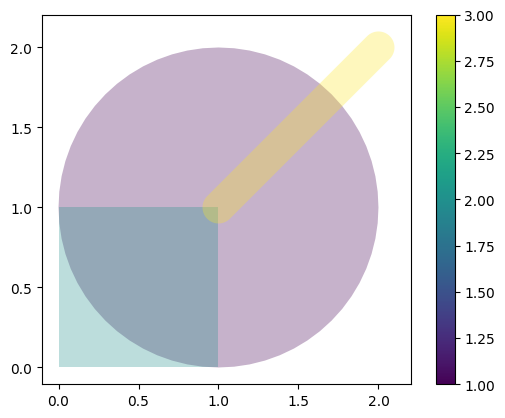

In [59]:
# Now lets make another dataset with some polygons

df2 = pd.DataFrame({
    'geometry':[c1,polygon,line.buffer(0.1)],
    'sid':[1,2,3]
})

gdf2 = gpd.GeoDataFrame(df2,geometry='geometry',crs="EPSG:4326") # This time, we should make sure it's in the same CRS as before
# though in this case, it will still work even if they aren't
gdf2.plot(column='sid',alpha=0.3,legend=True) # alpha is the transparency, with 0 fully transparent

In [60]:
#let's do our first spatial join!
sjoin1 = gpd.sjoin(gdf1,gdf2)
sjoin1

,point,pid,index_right,sid
0,POINT (1 1),1,1,2
0,POINT (1 1),1,0,1
0,POINT (1 1),1,2,3
1,POINT (2 2),2,2,3
4,POINT (0 0),5,1,2
5,POINT (0 1),6,1,2
5,POINT (0 1),6,0,1
6,POINT (1 1),7,1,2
6,POINT (1 1),7,0,1
6,POINT (1 1),7,2,3


You can see we don't have all the points we did before; there's no pid 3 for example. There are also multiple rows for certain points, like pid 1 intersects sid 1, 2, and 3. Also note that it kept the "point" column, the geometry from gdf1, but not the "geometry" column from gdf2. We can keep the other geometry column by switching the order.

In [61]:
sjoin2 = gpd.sjoin(gdf2,gdf1)
sjoin2

,geometry,sid,index_right,pid
0,"POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...",1,7,8
0,"POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...",1,5,6
0,"POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...",1,0,1
0,"POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...",1,6,7
1,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",2,4,5
1,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",2,7,8
1,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",2,5,6
1,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",2,0,1
1,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",2,6,7
2,"POLYGON ((1.92929 2.07071, 1.93656 2.0773, 1.9...",3,0,1


We get the same number of rows and they contain the same information, but now they're associated with the geometries in gdf2, rather than gdf1.

We can also change the type of join, for example, if we wanted to keep all the points in gdf1 and their geometries.

In [ ]:
sjoin3 = gpd.sjoin(gdf1,gdf2)
sjoin1